In [2]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.0


## Full 27 (2 pairs of 3 sibs included)

In [84]:
file = "/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo.vcf"

In [ ]:
allel.vcf_to_hdf5(file,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo.h5',
                  fields='*',
                  overwrite=True)

In [85]:
callset = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo.h5', mode='r')

In [86]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [87]:
len(variants)

69179

In [88]:
calldata = callset['calldata/GT']
gt = allel.GenotypeChunkedArray(calldata)
ac = gt.count_alleles(max_allele=3)
is_biallelic = ac.is_biallelic_01()[:]
ac_bi = ac.compress(is_biallelic, axis=0)[:, :2]

In [89]:
len(ac_bi)

42207

In [90]:
ac_bi_alt = ac_bi[:, 1]
unique, counts = np.unique(ac[:, 1], return_counts=True)
counts = counts/counts.sum()
perc = unique/54

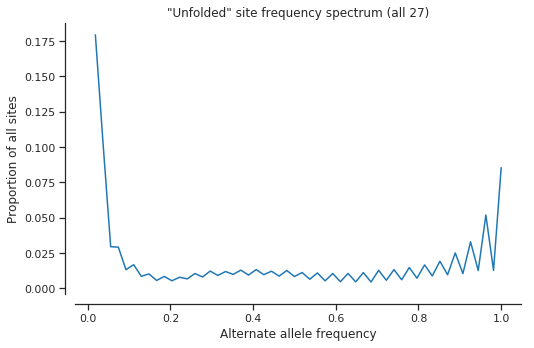

In [91]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.despine(ax=ax, offset=10)
plt.plot(perc[1:], counts[1:])
ax.set_title('"Unfolded" site frequency spectrum (all 27)')
ax.set_xlabel('Alternate allele frequency');
ax.set_ylabel('Proportion of all sites');

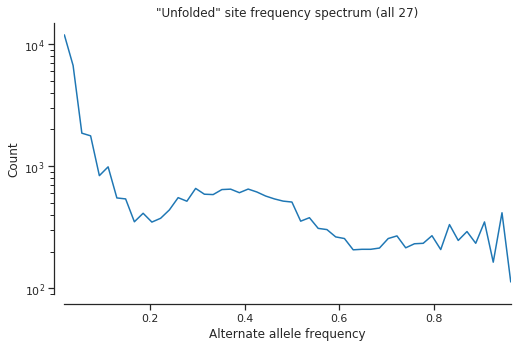

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.despine(ax=ax, offset=10)
sfs1 = allel.sfs(ac_bi_alt)
allel.plot_sfs(sfs1, ax=ax, n=54)
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 45000)
ax.set_title('"Unfolded" site frequency spectrum (all 27)')
ax.set_xlabel('Alternate allele frequency');
ax.set_ylabel('Count');

## No siblings - 23 samples

In [92]:
file2 = "/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN23_de_novo_deduped.vcf"

In [49]:
allel.vcf_to_hdf5(file2,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN23_de_novo_deduped.h5',
                  fields='*',
                  overwrite=True)

In [93]:
callset2 = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN23_de_novo_deduped.h5', mode='r')

In [94]:
variants2 = allel.VariantChunkedTable(callset2['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [95]:
len(variants2)

66125

In [96]:
calldata2 = callset2['calldata/GT']
gt2 = allel.GenotypeChunkedArray(calldata2)
ac2 = gt2.count_alleles(max_allele=3)
is_biallelic2 = ac2.is_biallelic_01()[:]
ac_bi2 = ac2.compress(is_biallelic2, axis=0)[:, :2]

In [97]:
len(ac_bi2)

39280

In [105]:
ac_bi_alt2 = ac_bi2[:, 1]
unique2, counts2 = np.unique(ac2[:, 1], return_counts=True)

In [106]:
counts2 = counts2/counts2.sum()
perc2 = unique2/46

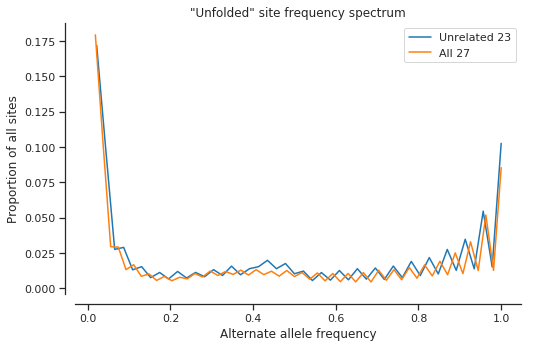

In [111]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.despine(ax=ax, offset=10)
plt.plot(perc2[1:], counts2[1:], label="Unrelated 23")
plt.plot(perc[1:], counts[1:], label="All 27")
ax.set_title('"Unfolded" site frequency spectrum')
ax.set_xlabel('Alternate allele frequency');
ax.set_ylabel('Proportion of all sites');
plt.legend(loc='upper right')